- Loads the .MAT file using scipy.io.loadmat.
- Extract the data for each day (Day0, Day1, ..., Day120) and their corresponding labels.
- Create separate DataFrames for each day's data and labels and then concatenates them into a single DataFrame (all_data).
- Shuffle the rows in the DataFrame using .sample(frac=1) and resets the index.
- The final DataFrame all_data can now be used for training an anomaly detection algorithm.

In [ ]:
# Total Marks: 2

# Task1: Analysis of Anomaly Detection Method 1 For Phishing or Malicious URL Detection

from scipy.io import loadmat

data = loadmat('/Users/patrickwood/Downloads/url.mat')



In [11]:
type (data)

dict

In [12]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FeatureTypes', 'Day120', 'Day119', 'Day118', 'Day117', 'Day116', 'Day115', 'Day114', 'Day113', 'Day112', 'Day111', 'Day110', 'Day109', 'Day108', 'Day107', 'Day106', 'Day105', 'Day104', 'Day103', 'Day102', 'Day101', 'Day100', 'Day99', 'Day98', 'Day97', 'Day96', 'Day95', 'Day94', 'Day93', 'Day92', 'Day91', 'Day90', 'Day89', 'Day88', 'Day87', 'Day86', 'Day85', 'Day84', 'Day83', 'Day82', 'Day81', 'Day80', 'Day79', 'Day78', 'Day77', 'Day76', 'Day75', 'Day74', 'Day73', 'Day72', 'Day71', 'Day70', 'Day69', 'Day68', 'Day67', 'Day66', 'Day65', 'Day64', 'Day63', 'Day62', 'Day61', 'Day60', 'Day59', 'Day58', 'Day57', 'Day56', 'Day55', 'Day54', 'Day53', 'Day52', 'Day51', 'Day50', 'Day49', 'Day48', 'Day47', 'Day46', 'Day45', 'Day44', 'Day43', 'Day42', 'Day41', 'Day40', 'Day39', 'Day38', 'Day37', 'Day36', 'Day35', 'Day34', 'Day33', 'Day32', 'Day31', 'Day30', 'Day29', 'Day28', 'Day27', 'Day26', 'Day25', 'Day24', 'Day23', 'Day22', 'Day21', 'Day20',

In [13]:
data['Day0']

array([[(<16000x3231961 sparse matrix of type '<class 'numpy.float64'>'
        	with 1847536 stored elements in Compressed Sparse Column format>, array([[0],
               [0],
               [0],
               ...,
               [0],
               [0],
               [1]], dtype=uint8))                                                    ]],
      dtype=[('data', 'O'), ('labels', 'O')])

In [14]:
import numpy as np
from scipy.io import loadmat
from scipy.sparse import csr_matrix

# Load data
data = loadmat('/Users/patrickwood/Downloads/url.mat')

# Assuming 'Day0' is one of the days you want to work with
day0_data = data['Day0']

# Extract the sparse matrix and labels
sparse_matrix = day0_data['data'][0,0]
labels = day0_data['labels'][0,0].flatten()

print(f'Shape of feature matrix: {sparse_matrix.shape}')
print(f'Shape of labels: {labels.shape}')

Shape of feature matrix: (16000, 3231961)
Shape of labels: (16000,)


In [15]:
from sklearn.preprocessing import MaxAbsScaler

# Normalize the features using MaxAbsScaler which maintains sparsity
scaler = MaxAbsScaler()
features_normalized = scaler.fit_transform(sparse_matrix)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (12800, 3231961)
Shape of X_test: (3200, 3231961)
Shape of y_train: (12800,)
Shape of y_test: (3200,)


Confusion Matrix:
[[1935  113]
 [ 957  195]]
True Positives: 195
False Positives: 113
True Negatives: 1935
False Negatives: 957
Accuracy: 0.6656
AUC-ROC Score: 0.3190


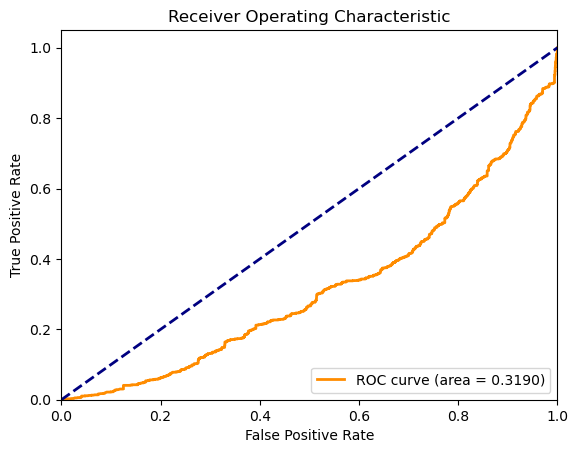

In [4]:
# Task1: Anomaly Detection Method 1 For Phishing or Malicious URL Detection

import numpy as np
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from scipy.io import loadmat
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
data = loadmat('/Users/patrickwood/Downloads/url.mat')

# Assuming 'Day0' is one of the days you want to work with
day0_data = data['Day0']

# Extract the sparse matrix and labels
sparse_matrix = day0_data['data'][0, 0]
labels = day0_data['labels'][0, 0].flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, random_state=42, contamination=0.1)

# Fit the model on the training data
iso_forest.fit(X_train)

# Get anomaly scores (decision function)
scores = iso_forest.decision_function(X_test)

# Predict the labels (anomalies) on the test set
y_pred = iso_forest.predict(X_test)

# Convert predictions: -1 for anomalies, 1 for normal instances
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluate the model

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print the results
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"Accuracy: {accuracy:.4f}")

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, scores)
auc_score = roc_auc_score(y_test, scores)

print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Confusion Matrix:
[[1873  175]
 [ 841  311]]
True Positives: 311
False Positives: 175
True Negatives: 1873
False Negatives: 841
Accuracy: 0.6825
AUC-ROC Score: 0.3276


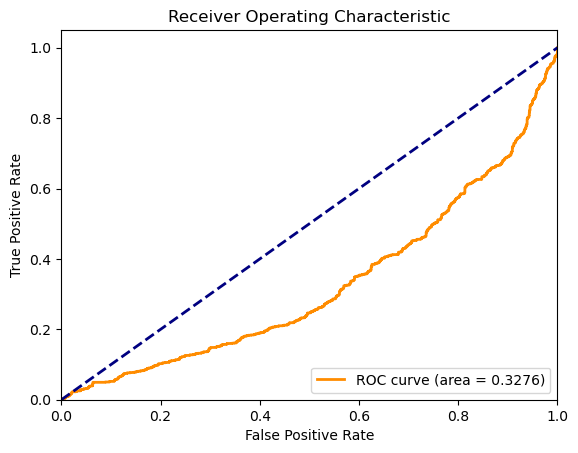

In [6]:
# Total Marks: 2

# Task1: Anomaly Detection Method 2 For Phishing or Malicious URL Detection

from sklearn.svm import OneClassSVM


# Assuming 'Day0' is one of the days you want to work with
day0_data = data['Day0']

# Extract the sparse matrix and labels
sparse_matrix = day0_data['data'][0, 0]
labels = day0_data['labels'][0, 0].flatten()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Fit the model on the training data
one_class_svm.fit(X_train)

# Get anomaly scores (decision function)
scores = one_class_svm.decision_function(X_test)

# Predict the labels (anomalies) on the test set
y_pred = one_class_svm.predict(X_test)

# Convert predictions: -1 for anomalies, 1 for normal instances
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluate the model

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print the results
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"Accuracy: {accuracy:.4f}")

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, scores)
auc_score = roc_auc_score(y_test, scores)

print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

